<a href="https://colab.research.google.com/github/inefable12/Exploracion_insilico_2024/blob/main/Clase_1_Exploracion_inSilico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{Exploración in silico | Sesión 1}$$
$$\large \textbf{Pre-optimización de moléculas a partir de dataframe}$$

_Autor: Jesus Alvarado Huayhuaz_

inefable12@gmail.com

Bienvenid@, en este primer notebook, aprenderemos a dibujar moléculas mediante la representación smiles, visualizar y comparar modificaciones, reconocer isómeros, manipular diedros y preoptimizar partiendo de dataframes con información de SMILES.

Te invitamos a revisar previamente un material introductorio de Python, pandas y Linux, si no estas familiarizado con estos, para comprender mejor el siguiente notebook. Te recomendamos también el siguiente material complementario:

1. https://github.com/inefable12/UNMSM_quimica_2023/blob/main/Python_para_quimica_2023.ipynb


2. https://github.com/inefable12/herramientas_basicas/blob/main/1_ABC_Python_github.ipynb

# 1. Visualización de moléculas

In [1]:
# Instalamos rdkit y mols2grid
%%capture
!pip install rdkit-pypi mols2grid

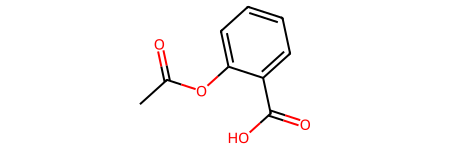

In [28]:
from rdkit.Chem import MolFromSmiles

mi_molecula = 'O=C(Oc1ccccc1C(=O)O)C'
MolFromSmiles(mi_molecula)

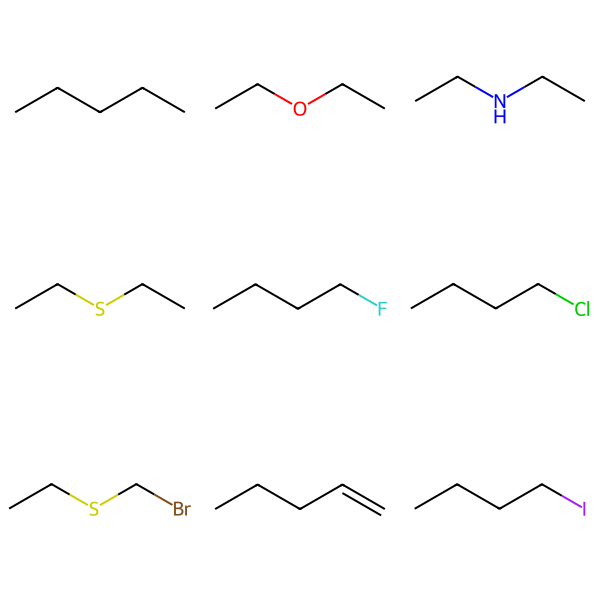

In [30]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles_list = ['CCCCC', 'CCOCC','CCNCC',
               'CCSCC','CCCCF','CCCCCl',
               'CCSCBr','CCCC(=C)','CCCCI']

#Ahora usando "list comprehension"
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

imagen = Draw.MolsToGridImage(mol_list)
imagen

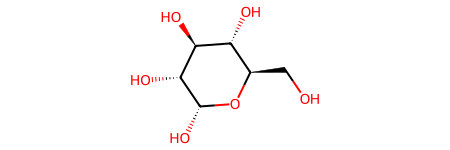

In [31]:
from rdkit.Chem import MolFromSmiles

alpha_d_glucose = 'O[C@@H]1[C@H](O)[C@@H](O)[C@H](O)[C@@H](CO)O1'
MolFromSmiles(alpha_d_glucose)

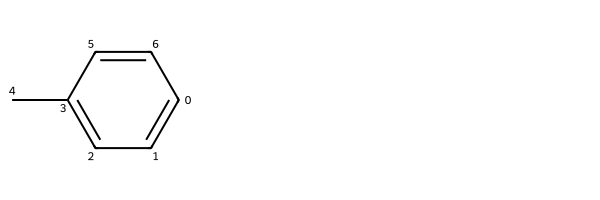

In [33]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

# SMILES para tolueno
smiles = "c1ccc(C)cc1"

# Convertimos a elemento de RDKit
mol = Chem.MolFromSmiles(smiles)

# Dibujamos la estructura
Draw.MolsToGridImage([mol])

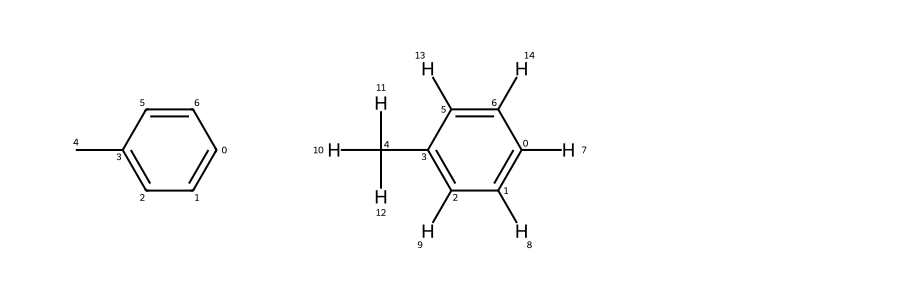

In [34]:
# Agregamos hidrógenos
mol_h = Chem.AddHs(mol)

# Mostramos ambas estructuras
Draw.MolsToGridImage([mol, mol_h], subImgSize=(300,300))

In [35]:
# Observamos las coordenadas ¡ojo!
print(Chem.MolToMolBlock(mol_h))


     RDKit          2D

 15 15  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000   -1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    2.5981    0

In [36]:
# Generamos las coordenadas 3D para un conformero aleatorio
Chem.AllChem.EmbedMolecule(mol_h)

# Observamos de nuevo la molécula
print(Chem.MolToMolBlock(mol_h))


     RDKit          3D

 15 15  0  0  0  0  0  0  0  0999 V2000
   -2.0966    0.0369   -0.1978 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3572    1.2011   -0.1586 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0172    1.1797   -0.0330 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7242   -0.0101    0.0601 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2014   -0.0352    0.1953 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0222   -1.1710    0.0203 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3959   -1.1482   -0.1053 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1749    0.0551   -0.2964 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8719    2.1639   -0.2288 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.6184    2.0823   -0.0001 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.7213   -0.1556   -0.7780 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5975    0.8839    0.6656 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.4893   -0.8693    0.8988 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5006   -2.1268    0

In [37]:
# Podemos guardar así:
Chem.MolToXYZFile(mol_h,"toluene.xyz")

# 2. Ángulo diedro

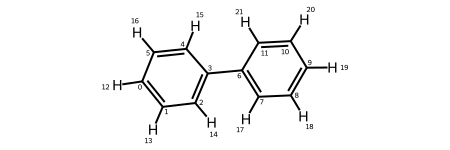

In [42]:
# Creamos una estructura de partida
smiles = "C1=CC=C(C=C1)C2=CC=CC=C2"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Chem.AllChem.EmbedMolecule(mol)
Chem.MolToXYZFile(mol, "initial.xyz")
mol

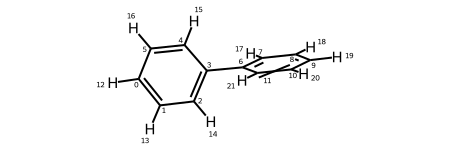

In [43]:
# Asignamos 90 grados al diedro
Chem.AllChem.SetDihedralDeg(mol.GetConformer(0),4,3,6,11,90.0)

# Guardamos el confórmero
Chem.MolToXYZFile(mol, "90.xyz")

# Visualizamos
mol

In [44]:
# Creamos una lista con diferentes diedros
diedros = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
mol_lista = []
for i in diedros:
  Chem.AllChem.SetDihedralDeg(mol.GetConformer(0),4,3,6,11,i)
  #mol_lista.append(mol)
  Chem.MolToXYZFile(mol, f"{i}.xyz")

Complementario: https://github.com/inefable12/UNMSM_quimica_2023/blob/main/4_diedros_pySCF.ipynb

# 3. Observamos las moléculas dentro de un DataFrame

In [2]:
# Librerías
import mols2grid
import pandas as pd

In [ ]:
# Disponemos de datos
#!wget https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv

In [17]:
# Guardamos en un dataframe usando pandas (pd)
sol = pd.read_csv('delaney.csv')
sol

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl


In [18]:
# Dimensiones
sol.shape

(4, 4)

In [19]:
# Con mols2grid aplicamos la operación display en la columna SMILES
mols2grid.display(sol, smiles_col="SMILES")

MolGridWidget()

In [9]:
# Instalamos obabel
%%capture
!apt-get -qq install -y openbabel

In [11]:
sol.SMILES

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object

In [20]:
import pandas as pd

# Nombre del archivo de texto de salida
archivo_salida = 'mis_moleculas.txt'

# Selecciona la columna que deseas convertir en el archivo de texto
mis_smiles = sol['SMILES']

# Escribe la columna en el archivo de texto
mis_smiles.to_csv(archivo_salida, index=False, header=False)

In [22]:
# generamos estructuras 3D para la columna "SMILES"
!obabel -i smi mis_moleculas.txt -o sdf --gen3D > output.sdf

4 molecules converted


In [24]:
!cat output.sdf


 OpenBabel01202422453D

  8  7  0  0  0  0  0  0  0  0999 V2000
    1.1752   -0.2660   -0.8044 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    2.7518   -0.0419    0.0233 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.2634    1.4007    0.0559 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0367    2.5619    0.6466 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    4.6680    1.4766    1.1872 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    3.8372    1.9120   -1.5581 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    3.4621   -0.6934   -0.5152 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.6346   -0.4599    1.0259 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  2  7  1  0  0  0  0
  2  8  1  0  0  0  0
  3  4  1  0  0  0  0
  3  5  1  0  0  0  0
  3  6  1  0  0  0  0
M  END
$$$$

 OpenBabel01202422453D

  8  7  0  0  0  0  0  0  0  0999 V2000
    0.9640   -0.0436   -0.0733 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.4865   -0.0437   -0.0732 C   0  0  0  0  0  0  0  0  0  0  0  0
    

In [26]:
# Verificamos si tenemos avisos de alerta
!grep WARNING output.sdf

In [ ]:
# !cp output.sdf output_edit.sdf
# !grep -v WARNING output_edit > output.sdf
# !grep WARNING output.sdf

In [ ]:
# Preoptimización
!obabel output.sdf -O opt.xyz --minimize --sd --steps 20000 --ff MMFF94 -p 7.4 --log -m